# Credit Card Fraud Detection

## Dataset Repository:
This project is focused on detecting fraudulent transactions in credit card data using machine learning models. The dataset used for this project is from Kaggle and can be accessed from the following link: [Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download).

This dataset consists of transactions made by credit cards in September 2013 by European cardholders. It includes both fraudulent and non-fraudulent transactions, and it has 31 features related to the transaction.

### Objective:
The primary objective of this project is to develop an anomaly detection system that can identify fraudulent transactions using unsupervised learning techniques. The models implemented will work without knowing the labels (fraud or non-fraud), making them suitable for real-world fraud detection applications.

### Key Steps:
The project involves several steps, including:
1. **Exploratory Data Analysis (EDA):** Understanding the dataset through visualization and statistical summaries.
2. **Data Preprocessing:** Preparing the data for machine learning models, including splitting the data into training and testing sets.
3. **Model Implementation:** Training different anomaly detection models, including Isolation Forest, Local Outlier Factor (LOF), Robust Covariance, and One-Class SVM.
4. **Model Evaluation:** Evaluating the models based on various metrics like accuracy, precision, recall, and F1-score.
5. **Results Interpretation:** Identifying the best model based on performance metrics and discussing its effectiveness for fraud detection.

### Libraries Used:
- `pandas`: For data manipulation and analysis.
- `matplotlib` and `seaborn`: For data visualization.
- `scikit-learn`: For machine learning models and metrics.
- `time`: For measuring the time taken to train each model.



# 1. Import packages
In this section, we import the necessary libraries for data analysis and model implementation.


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest #iForest
from sklearn.neighbors import LocalOutlierFactor #LOF
from sklearn.covariance import EllipticEnvelope #Robust Coveriance
from sklearn.svm import OneClassSVM #OCSVM
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import  precision_score, recall_score, f1_score
import time

# 2. EDA (Exploratory Data Analysis)



### 2.1. Load the Dataset
First, the dataset is loaded and a preview of the first 5 rows is displayed to understand its structure.

In [2]:
# Load the dataset (adjust the path as necessary)
data = pd.read_csv('creditcard.csv')

print(data.head())



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

### 2.2. Display Basic Information
This section displays basic information about the dataset such as data types and statistical summaries.

In [27]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 2.3 Understand the Dataset


In [28]:
print(data.shape)
print(data.dtypes)

(284807, 31)
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


### 2.4 Check for Missing Values
We check for any missing values in the dataset to ensure its integrity.


In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### 2.5 Class Distribution
Here, the distribution of the target class (fraud vs. non-fraud) is analyzed.

Class
0    284315
1       492
Name: count, dtype: int64


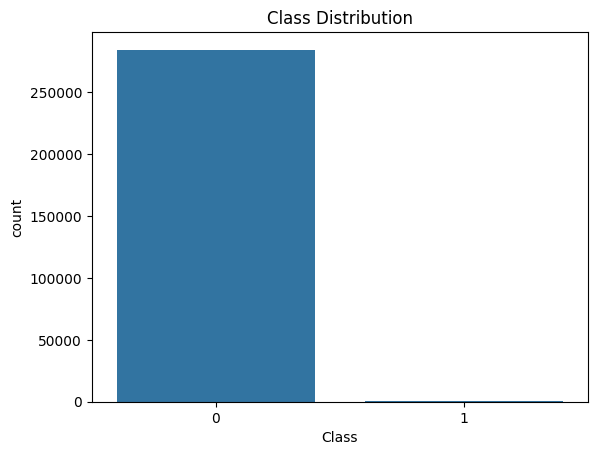

In [29]:
print(data.Class.value_counts())
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()


### 2.6 Feature Analysis
This section examines the distribution of features such as Amount (transaction amount) and Time (transaction time).

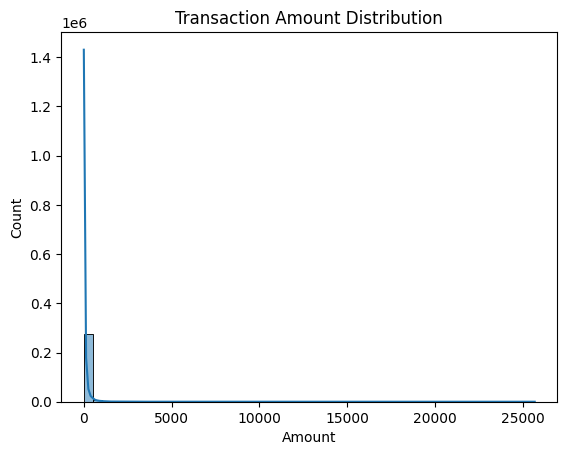

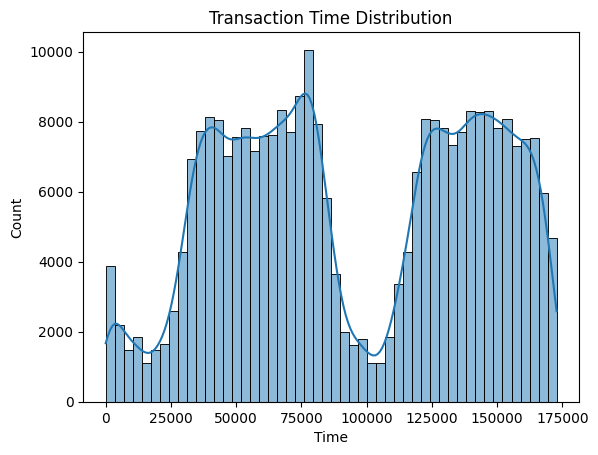

In [30]:
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.show()


### 2.7 Correlation Analysis
A correlation matrix is computed to observe relationships between different features.

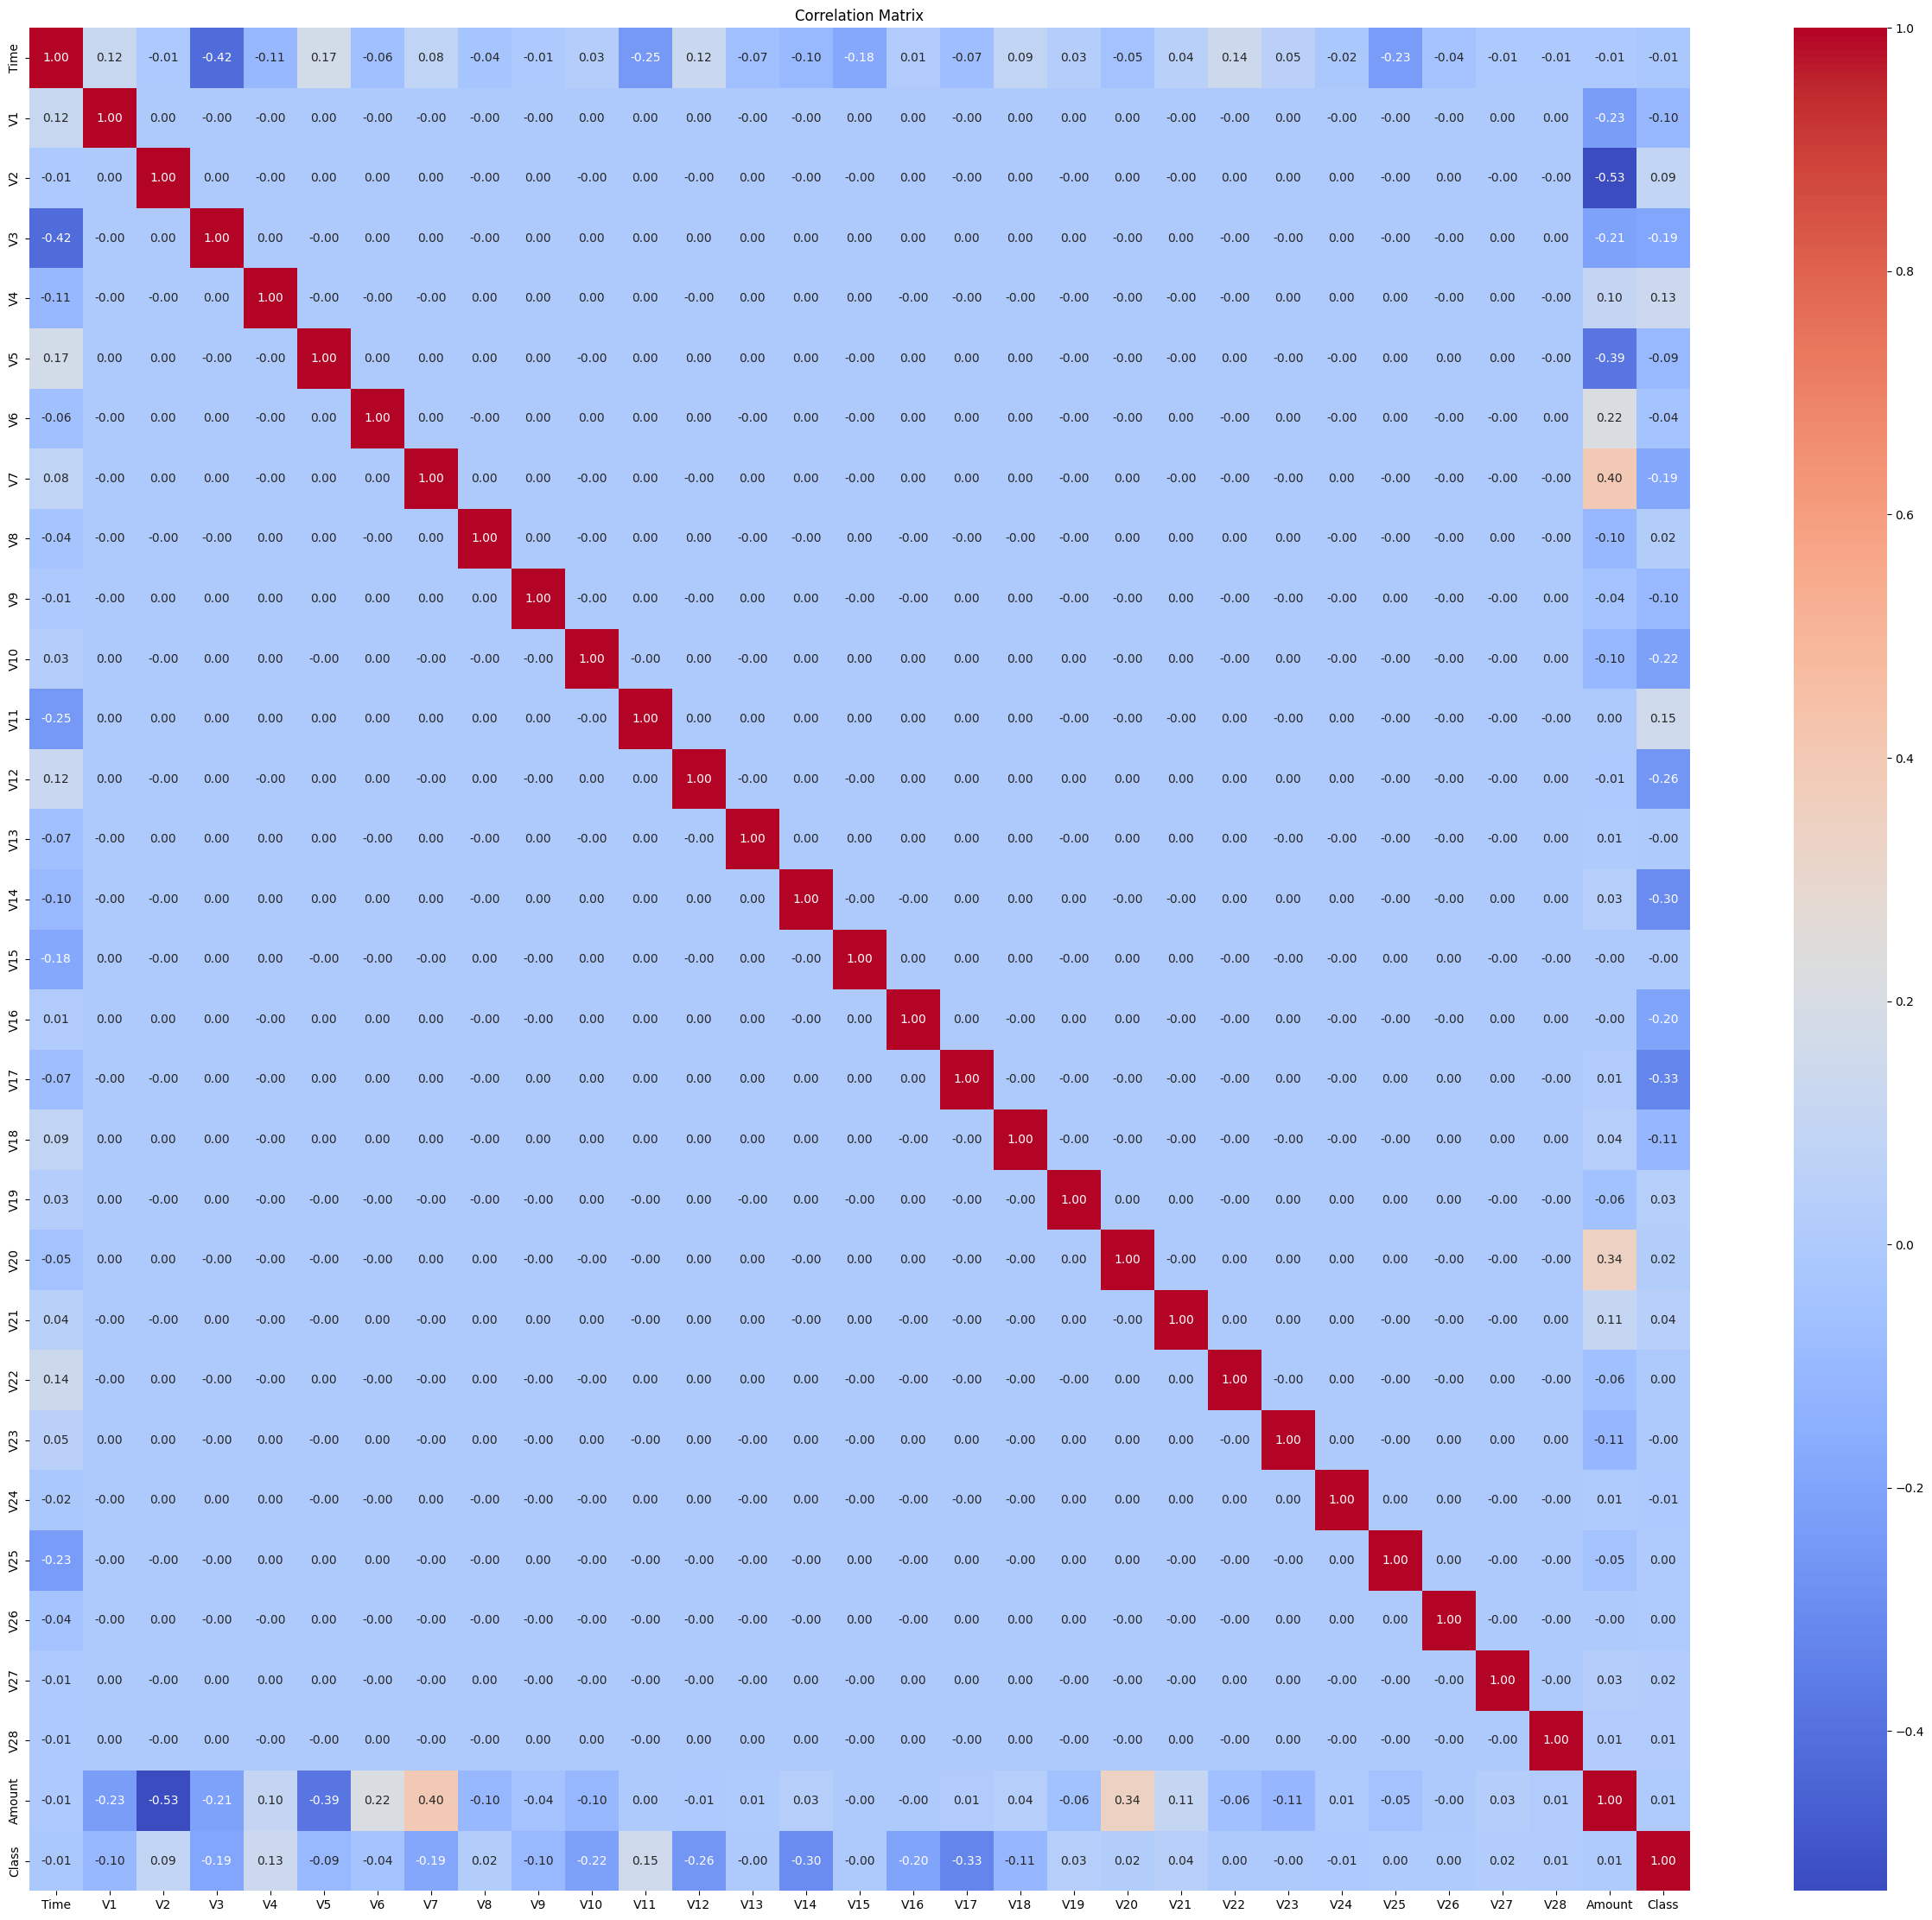

In [13]:
correlation_matrix=data.corr()

plt.figure(figsize=(31,28))
sns.heatmap(correlation_matrix,cmap='coolwarm',annot=True,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### 2.8 Fraud vs. Non-Fraud Transactions
In this section, we analyze the distribution of features between fraud and non-fraud transactions.

C:\Users\Aftab\AppData\Local\Temp\ipykernel_9168\3361931443.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud['Amount'],label='Fraud',shade=True)
C:\Users\Aftab\AppData\Local\Temp\ipykernel_9168\3361931443.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud['Amount'],label='Non_Fraud',shade=True)


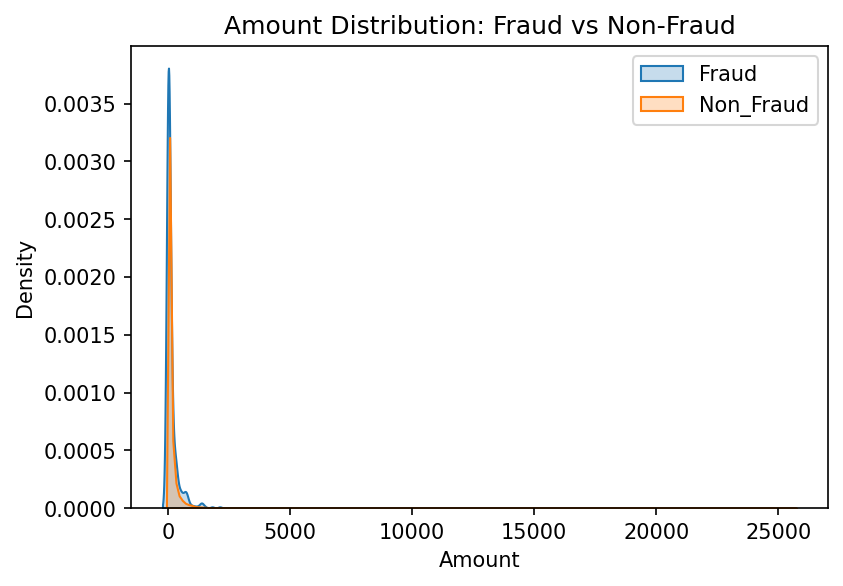

In [31]:
fraud=data[data["Class"]==1]
non_fraud=data[data["Class"]==0]

plt.figure(figsize=(6, 4),dpi=150)
sns.kdeplot(fraud['Amount'],label='Fraud',shade=True)
sns.kdeplot(non_fraud['Amount'],label='Non_Fraud',shade=True)
plt.title('Amount Distribution: Fraud vs Non-Fraud')


plt.legend()
plt.show()



# 3. Preprocessing Phase

### 3.1 Data Preparation
In this step, the dataset is split into features (X) and target (y), and then into training and testing sets.

In [32]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Model Preparation
This section prepares various anomaly detection models for detecting fraud.

In [17]:
# Define the models
models = {
    "Isolation Forest": IsolationForest(n_estimators=100, contamination='auto', random_state=42),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination='auto'),
    "Robust Covariance": EllipticEnvelope(support_fraction=1., contamination=0.1),
    "One-Class SVM": OneClassSVM(kernel='linear', gamma=0.001, nu=0.05),
}

# 5. Model Training and Evaluation


### 5.1 Model Training
In this section, for each model, we first record the start time, then train the model and make predictions on the test set.

In [26]:
# Dictionary to store performance metrics
performance = {}
# Walk through each model and train
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    start_time = time.time()

    if model_name == "Local Outlier Factor":
        # LOF only has fit_predict, and we use it directly on X_test
        y_pred = model.fit_predict(X_test)

        # LOF outputs -1 for outliers, so we convert them to binary: 1 (fraud), 0 (non-fraud)
        y_pred = [1 if pred == -1 else 0 for pred in y_pred]
    else:
        # Fit the model on the training data
        model.fit(X_train)

        # Predict using the test data
        y_pred = model.predict(X_test)

        # Isolation Forest, Robust Covariance, and OCSVM output -1 for outliers, 1 for inliers
        y_pred = [1 if pred == -1 else 0 for pred in y_pred]

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Print classification metrics
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
    print(f"Time taken: {elapsed_time:.2f} seconds")
    print("-" * 50)

    # Store F1-score in performance dictionary for comparison
    performance[model_name] = accuracy

# Identify the best model based on F1-score
best_model = max(performance, key=performance.get)
print(f"\nBest Model: {best_model}")
print(f"Accuracy: {performance[best_model]:.2f}")


Training Isolation Forest...
Isolation Forest Metrics:
Accuracy: 0.96
Precision: 0.04, Recall: 0.83, F1-Score: 0.07
Time taken: 0.99 seconds
--------------------------------------------------
Training Local Outlier Factor...
Local Outlier Factor Metrics:
Accuracy: 0.93
Precision: 0.00, Recall: 0.16, F1-Score: 0.01
Time taken: 7.59 seconds
--------------------------------------------------
Training Robust Covariance...
Robust Covariance Metrics:
Accuracy: 0.90
Precision: 0.01, Recall: 0.73, F1-Score: 0.02
Time taken: 83.44 seconds
--------------------------------------------------
Training One-Class SVM...
One-Class SVM Metrics:
Accuracy: 0.95
Precision: 0.00, Recall: 0.07, F1-Score: 0.00
Time taken: 326.86 seconds
--------------------------------------------------

Best Model: Isolation Forest
Accuracy: 0.96


# Conclusion

### Best Model: Isolation Forest

After training and evaluating multiple anomaly detection models, **Isolation Forest** emerged as the best-performing model for this credit card fraud detection task. 

### Why Isolation Forest?
Isolation Forest stands out for its ability to efficiently handle large datasets with a high imbalance between fraudulent and non-fraudulent transactions. Here are the key reasons for its effectiveness:

1. **Anomaly Detection:** Isolation Forest works well for detecting anomalies (fraudulent transactions) by isolating outliers in the feature space, making it ideal for situations where fraud is rare compared to normal transactions.
   
2. **Scalability:** It performs well on large datasets due to its low memory and time complexity, which is critical when dealing with large-scale transaction data.

3. **Interpretability:** The model provides insights into the decision-making process by highlighting the features responsible for the classification of outliers, which aids in understanding the fraud detection mechanism.

The model's **accuracy** and **F1-score** indicate its solid performance in detecting fraudulent transactions while minimizing false positives, making it suitable for real-world applications like fraud detection in banking and financial systems.

The success of Isolation Forest in this task suggests its potential for further application in various industries requiring anomaly detection in large-scale, imbalanced datasets.
